# Activity 4: Data Analysis!

## Overview

For this activity, we are going to be using data on the WIC (Women, Infants, and Children) supplemental nutrition program. Our data contains the state and/or tribe and the number of people enrolled in the program in a given year.

You don't need to know what next few lines of code are doing, but in essence, they're reading in a table from a file! We'll talk more about how data is stored soon, but we often transport data from one place to another in CSV (comma-separated value) format. Since we're looking at real data here, we're reading in from a CSV file!

We got this data from https://catalog.data.gov/dataset/women-infants-and-children-wic-participating-and-cost-data


In [1]:
from otd_util import *

In [2]:
WIC_States_and_Tribes_Data = read_table('WIC_Participation_edited.csv', columns=[0, 5], column_names={'FY 2018':'Total Enrollment', "State / Indian Tribe         ":'State/Indian Tribe'})
WIC_States_and_Tribes = {'State/Indian Tribe': list(WIC_States_and_Tribes_Data['State/Indian Tribe']), 'Total Enrollment': list(WIC_States_and_Tribes_Data['Total Enrollment'])}

## Problem 1: Loops

Loops can help us perform the same set of actions on multiple pieces of data! We will use loops to filter data and remove pieces we don't want or modify data to make is easier for us to use. 

Let's take a look at the data we have first. We have two columns: `State/Indian Tribe` and `Total Enrollment`.

In [3]:
visualize_table(WIC_States_and_Tribes)

      State/Indian Tribe Total Enrollment
0                Alabama          120,605
1                 Alaska           17,092
2         American Samoa            5,235
3                Arizona          149,513
4        Dept. of Health          133,547
..                   ...              ...
98               Wyoming            9,062
99       Dept. of Health            8,607
100    Northern Arapahoe              282
101       Shoshone Tribe              173
102    Northern Marianas            3,205

[103 rows x 2 columns]


In the cell above we have downloaded a table that shows us each state and Native American tribe in the country and their respective enrollment in the WIC program. 

As you may recall from Module 2, a table is made up of columns. The table we are using has two columns named 'Total Enrollment' and 'State / Indian Tribe'. Each column is a list with every piece of data about a certain topic. We can use square brackets like these [] to view the columns in a table in list form. 

In [4]:
WIC_States_and_Tribes["Total Enrollment"]

['120,605',
 '17,092',
 '5,235',
 '149,513',
 '133,547',
 '7,561',
 '8,406',
 '73,607',
 '1,009,492',
 '85,258',
 '85,103',
 '155',
 '47,297',
 '16,797',
 '12,466',
 '450,624',
 '217,695',
 '6,610',
 '26,115',
 '33,717',
 '199,360',
 '143,730',
 '60,249',
 '50,681',
 '101,743',
 '112,362',
 '18,320',
 '18,200',
 '61',
 '60',
 '128,542',
 '108,593',
 '213,964',
 '105,961',
 '85,449',
 '84,783',
 '666',
 '114,323',
 '16,682',
 '35,833',
 '35,245',
 '246',
 '211',
 '131',
 '62,531',
 '61,161',
 '1,370',
 '12,332',
 '141,568',
 '46,187',
 '42,921',
 '243',
 '1,385',
 '572',
 '234',
 '213',
 '234',
 '385',
 '416,173',
 '415,988',
 '185',
 '221,719',
 '221,175',
 '544',
 '12,313',
 '11,485',
 '555',
 '272',
 '208,955',
 '98,551',
 '73,587',
 '3,696',
 '3,398',
 '2,373',
 '6,594',
 '1,499',
 '2,939',
 '382',
 '723',
 '3,362',
 '85,774',
 '218,188',
 '112,709',
 '18,950',
 '92,153',
 '17,667',
 '15,760',
 '757',
 '1,150',
 '127,814',
 '746,246',
 '48,989',
 '11,427',
 '113,952',
 '2,836',
 '14

Remember when we learned about data types? The four data types we talked about are: integers, strings, floats, and booleans. Look back in the textbook if you do not remember what these are. 

It is good practice to check what kind of data you are working with so you know what kind of tools you can use on it. A good rule of thumb is for data in 'words' (like the names of states and tribes) to be in strings while data in 'numbers' (like the total enrollment) would be in integers. You can use the type() function to check the type of a single piece of data. 

In [5]:
type('this is a string')

str

Let's check what type of data the 'State / Indian Tribe' column has by using the type() function on its first element!

In [6]:
type(WIC_States_and_Tribes["State/Indian Tribe"][0])

str

Now, let's look at the type of data in the 'Total Enrollment' column:

In [7]:
type(WIC_States_and_Tribes["Total Enrollment"][0])

str

Oh no! The data in this column is in strings instead of integers. Don't worry! We can use a for loop to change the type of every element in the column into an integer by applying the int() function to each value in the column.

In [8]:
int('10')

10

However, this might have issues when there are commas in the data. What happens when the following cell is run?

In [9]:
int('10,000')

ValueError: invalid literal for int() with base 10: '10,000'

So let's try removing the commas from our number string and turning that into an integer:

In [10]:
no_commas = '10,000'.replace(',', '')
int(no_commas)

10000

Now, let's try doing this in a loop to get a new list where all of the values are numbers!

In [11]:
integer_enrollment = []

for num in WIC_States_and_Tribes["Total Enrollment"]:
    no_commas = num.replace(',', '')
    integer_enrollment.append(int(no_commas))

print(integer_enrollment)

[120605, 17092, 5235, 149513, 133547, 7561, 8406, 73607, 1009492, 85258, 85103, 155, 47297, 16797, 12466, 450624, 217695, 6610, 26115, 33717, 199360, 143730, 60249, 50681, 101743, 112362, 18320, 18200, 61, 60, 128542, 108593, 213964, 105961, 85449, 84783, 666, 114323, 16682, 35833, 35245, 246, 211, 131, 62531, 61161, 1370, 12332, 141568, 46187, 42921, 243, 1385, 572, 234, 213, 234, 385, 416173, 415988, 185, 221719, 221175, 544, 12313, 11485, 555, 272, 208955, 98551, 73587, 3696, 3398, 2373, 6594, 1499, 2939, 382, 723, 3362, 85774, 218188, 112709, 18950, 92153, 17667, 15760, 757, 1150, 127814, 746246, 48989, 11427, 113952, 2836, 145015, 35412, 92487, 9062, 8607, 282, 173, 3205]


Our table currently shows us the number of people enrolled in WIC by state and by Native American Tribe. Since the state counts include tribe counts, let's try removing all the Tribe counts in the table. 

How do we tell Python which rows are tribe counts and which are state counts? Notice that the tribe counts have a space at the beginning of the names. For example, the one of the first Tribe entries is `' Navajo Nation'`. We need to constuct a filter that goes through every entry in the data table and removes ones that start with a space. We can do this using a loop. 

In [12]:
WIC_States_and_Tribes["State/Indian Tribe"][5]

'  Navajo Nation'

In [13]:
state_names = []
corresponding_numbers = []

index_value = 0

for state in WIC_States_and_Tribes["State/Indian Tribe"]: 
    if state[0] != ' ': #this indexes a string to get the first charecter
        state_names.append(state)
        corresponding_numbers.append(integer_enrollment[index_value])
        
    index_value += 1

Now, let's replace our old `Total Enrollment` and `State/Indian Tribe` columns with our new lists!

In [14]:
WIC_States_and_Tribes["Total Enrollment"] = corresponding_numbers
WIC_States_and_Tribes["State/Indian Tribe"] = state_names

## Problem 2: Analysis

### Analysis Part 1:

In this next section, we will combine all the tools you have learned throughout this module to learn more about the data as a whole. You will be finding the top 10 states with largest enrollment in WIC programs and make a bar chart of the values.

We want to find the top 10 largest values within corresponding numbers. We can start by sorting the enrollment counts per state in descending order (largest to smallest). We can use the `sorted` function to sort a list; setting the `reverse` argument to `True` tells it to sort from largest to smallest.

In [15]:
sorted_enrollment = sorted(WIC_States_and_Tribes["Total Enrollment"], reverse = True) ## TEACH SORT IN LIST SECTION

Now that the list is sorted from largest to smallest, assign the ten largest counts to the name `top_10_amounts` as a list.

In [16]:
top_10_amounts = sorted_enrollment[0:10] #SOLUTION
top_10_amounts

[1009492,
 746246,
 450624,
 416173,
 221719,
 218188,
 217695,
 213964,
 208955,
 199360]

With the top ten values, we can find out where they were in the original list to find the correct corresponding states. To do this, we can use a for loop that goes through each "row" of our table and adding the state to our top ten list if its enrollment value corresponds to our state.

In [17]:
top_state_enrollments = {}
num_states = len(WIC_States_and_Tribes["State/Indian Tribe"]) # number of states
for i in range(num_states):
    state = WIC_States_and_Tribes["State/Indian Tribe"][i] # get state at row
    enrollment = WIC_States_and_Tribes["Total Enrollment"][i] # get enrollment at row
    if enrollment in top_10_amounts:
        top_state_enrollments[state] = enrollment
        
top_state_enrollments

{'California': 1009492,
 'Florida': 450624,
 'Georgia': 217695,
 'Illinois': 199360,
 'Michigan': 213964,
 'New York': 416173,
 'North Carolina': 221719,
 'Ohio': 208955,
 'Pennsylvania': 218188,
 'Texas': 746246}

Now that we have the indices of the top ten enrollment counts, we can index into the state_names list to get the corresponding state names to these counts. Use a forloop to obtain the values.

Hooray! At this point, we have both the top ten enrollment counts and the state names that correspond to those counts. Let's make a new table using the `visualize_table()` function to see values look like side by side. Start this by making a dictionary of the values using the variable we just found in this section.

In [18]:
top_states = list(top_state_enrollments.keys())
top_enrollments = list(top_state_enrollments.values())
top_state_and_value = {'State': top_states, "Enrollment": top_enrollments}

In [19]:
visualize_table(top_state_and_value)

            State  Enrollment
0      California     1009492
1         Florida      450624
2         Georgia      217695
3        Illinois      199360
4        Michigan      213964
5        New York      416173
6  North Carolina      221719
7            Ohio      208955
8    Pennsylvania      218188
9           Texas      746246


We can see the table we have made up to this point, and we are able to use this information to plot the different states against each other. This is helpful, because we can understand how frequently people need help in some states versus others.

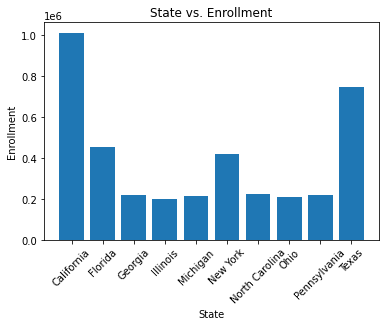

In [20]:
bar(top_state_and_value, 'State', "Enrollment")

In the bar chart, we can see that California has the largest enrollment in WIC as 1,009,492 people use these services. The next state is Texas and has around 250,000 fewer people enrolled. How is the difference between the enrollment of each state so far apart. Something to consider is the size of the population. California has over 39 million people within the state at this time, while Texas has around 27 million people. Based on the different population sizes we would expect California to have more people enrolled.
